In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Regression Results.xlsx', header=None)
df

,0,1
0,Size Decile 1 Return,0.701
1,NaN,(1.49)
2,NaN,NaN
3,Size Decile 2 Return,0.683
4,NaN,(1.50)
5,NaN,NaN
6,Size Decile 3 Return,0.865*
7,NaN,(1.92)
8,NaN,NaN
9,Size Decile 4 Return,0.574


In [8]:
# df1 = df.iloc[[1]]
# df1.head()
df1 = df.dropna(subset=[0]).reset_index(drop=True)
df1

,0,1
0,Size Decile 1 Return,0.701
1,Size Decile 2 Return,0.683
2,Size Decile 3 Return,0.865*
3,Size Decile 4 Return,0.574
4,Size Decile 5 Return,0.595
5,Size Decile 6 Return,0.579
6,Size Decile 7 Return,0.640
7,Size Decile 8 Return,0.756*
8,Size Decile 9 Return,0.666
9,Size Decile 10 Return,0.849*


In [9]:
df2 = df1.copy()
df2.columns = ['Size Deciel 1~10', 'coefficent']
df2["coefficent_val"] = df2["coefficent"].str.extract(r"(-?\d+\.\d+|\d+)", expand=False).astype(float)
df2["coefficent_sig"] = df2["coefficent"].str.extract(r"(\*+)", expand=False).fillna("")  # Extract the stars
df2

,Size Deciel 1~10,coefficent,coefficent_val,coefficent_sig
0,Size Decile 1 Return,0.701,0.701,
1,Size Decile 2 Return,0.683,0.683,
2,Size Decile 3 Return,0.865*,0.865,*
3,Size Decile 4 Return,0.574,0.574,
4,Size Decile 5 Return,0.595,0.595,
5,Size Decile 6 Return,0.579,0.579,
6,Size Decile 7 Return,0.640,0.640,
7,Size Decile 8 Return,0.756*,0.756,*
8,Size Decile 9 Return,0.666,0.666,
9,Size Decile 10 Return,0.849*,0.849,*


RangeIndex(start=0, stop=10, step=1)


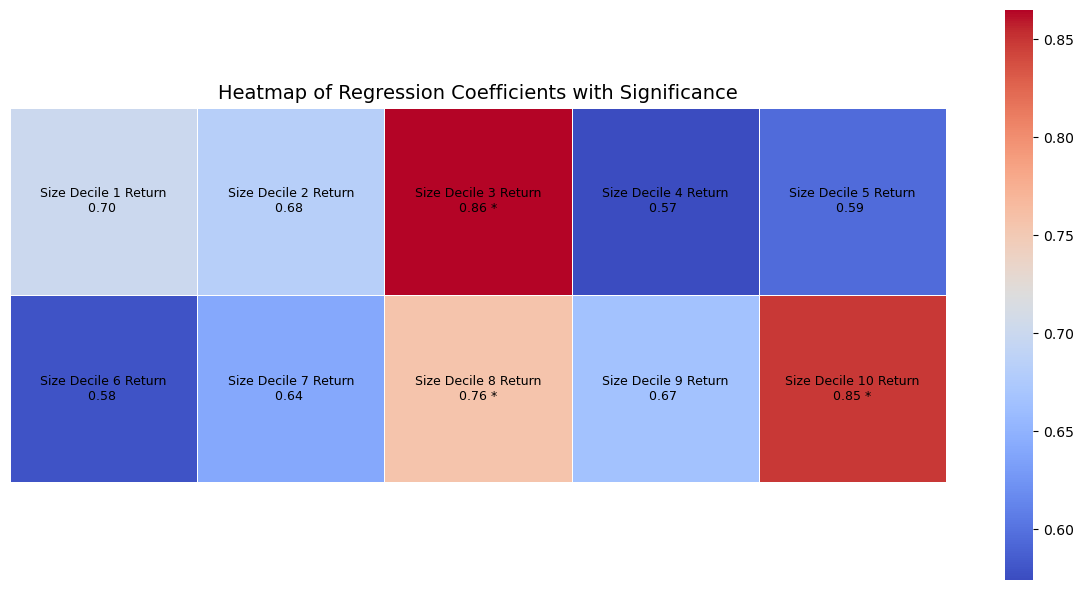

In [10]:
# df2['industry'] = df2['industry'].apply(lambda x: x.replace('_', ' '))
# df2 = df2.sort_values(by='coefficent_val').reindex()

# # Assume df2 is already prepared and sorted
# df2 = df2.sort_values(by='coefficent_val').reset_index(drop=True)

n_columns = 5  # Number of columns in the heatmap
print(df2.index)
df2["Row"] = df2.index // n_columns  # Create 2 rows
df2["Column"] = df2.index % n_columns  # Create 5 columns

heatmap_data = df2.pivot(index="Row", columns="Column", values="coefficent_val")
annotations = df2.pivot(index="Row", columns="Column", values="coefficent_sig")
Size_Deciel = df2.pivot(index="Row", columns="Column", values="Size Deciel 1~10")

# Plot the heatmap
plt.figure(figsize=(12, 6))  # Adjust the figure size for 2x5 layout
ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, linewidths=0.5, square=True)

# Annotate Heatmap with Coefficients and Stars
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        coeff = heatmap_data.iloc[i, j]
        star = annotations.iloc[i, j] if not pd.isna(annotations.iloc[i, j]) else ""
        industry = Size_Deciel.iloc[i, j] if not pd.isna(Size_Deciel.iloc[i, j]) else ""
        text = f"{coeff:.2f} {star}" if not pd.isna(coeff) else ""
        ax.text(j + 0.5, i + 0.5, f"{industry}\n{text}", ha="center", va="center", fontsize=9)

# Adjust Layout
plt.title("Heatmap of Regression Coefficients with Significance", fontsize=14)
plt.xticks([])  # Remove x-axis labels
plt.xlabel(None)
plt.yticks([])  # Remove y-axis labels
plt.ylabel(None)
plt.tight_layout()
plt.savefig("heatmap2.png", format="png", dpi=600)
plt.show()

In [ ]:
# df2 = df1.transpose().reset_index()
# df2.columns=['industry','mktrf_l']
# df2 = df2[1:]
# df2.head()

In [8]:
# df2["mktrf_l_val"] = df2["mktrf_l"].str.extract(r"(-?\d+\.\d+|\d+)", expand=False).astype(float)
# df2["mktrf_l_sig"] = df2["mktrf_l"].str.extract(r"(\*+)", expand=False).fillna("")  # Extract the stars
# df2.head()

,industry,mktrf_l,mktrf_l_val,mktrf_l_sig
1,0.701,NaN,NaN,


In [ ]:
# df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   industry     1 non-null      object 
 1   mktrf_l      0 non-null      object 
 2   mktrf_l_val  0 non-null      float64
 3   mktrf_l_sig  1 non-null      object 
dtypes: float64(1), object(3)
memory usage: 164.0+ bytes


In [10]:
# df2['mktrf_l_sig'].value_counts()

mktrf_l_sig
    1
Name: count, dtype: int64

In [ ]:
df2 = df1
df2['industry'] = df2['industry'].apply(lambda x: x.replace('_', ' '))
df2 = df2.sort_values(by='mktrf_l_val').reindex()

n_rows = 1  # Number of rows in the reshaped heatmap
df2["Row"] = df2.index // n_rows  # Create row groups
df2["Column"] = df2.index % n_rows  # Create column groups

heatmap_data = df2.pivot(index="Row", columns="Column", values="mktrf_l_val")
annotations = df2.pivot(index="Row", columns="Column", values="mktrf_l_sig")
industries = df2.pivot(index="Row", columns="Column", values="industry")

# Step 2: Plot the Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size to fit A4 paper
ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, linewidths=0.5)

# Step 3: Annotate Heatmap with Coefficients and Stars
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        coeff = heatmap_data.iloc[i, j]
        star = annotations.iloc[i, j] if not pd.isna(annotations.iloc[i, j]) else ""
        industry = industries.iloc[i, j] if not pd.isna(industries.iloc[i, j]) else ""
        text = f"{coeff:.2f} {star}" if not pd.isna(coeff) else ""
        ax.text(j + 0.5, i + 0.5, f"{industry}\n{text}", ha="center", va="center", fontsize=9)

# Step 4: Adjust Layout
plt.title("Heatmap of Regression Coefficients with Significance", fontsize=14)
plt.xticks([])  # Remove x-axis labels (column numbers are artificial)
plt.yticks([])  # Remove y-axis labels (row numbers are artificial)
plt.tight_layout()

# Show the Heatmap
plt.show()

d:\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


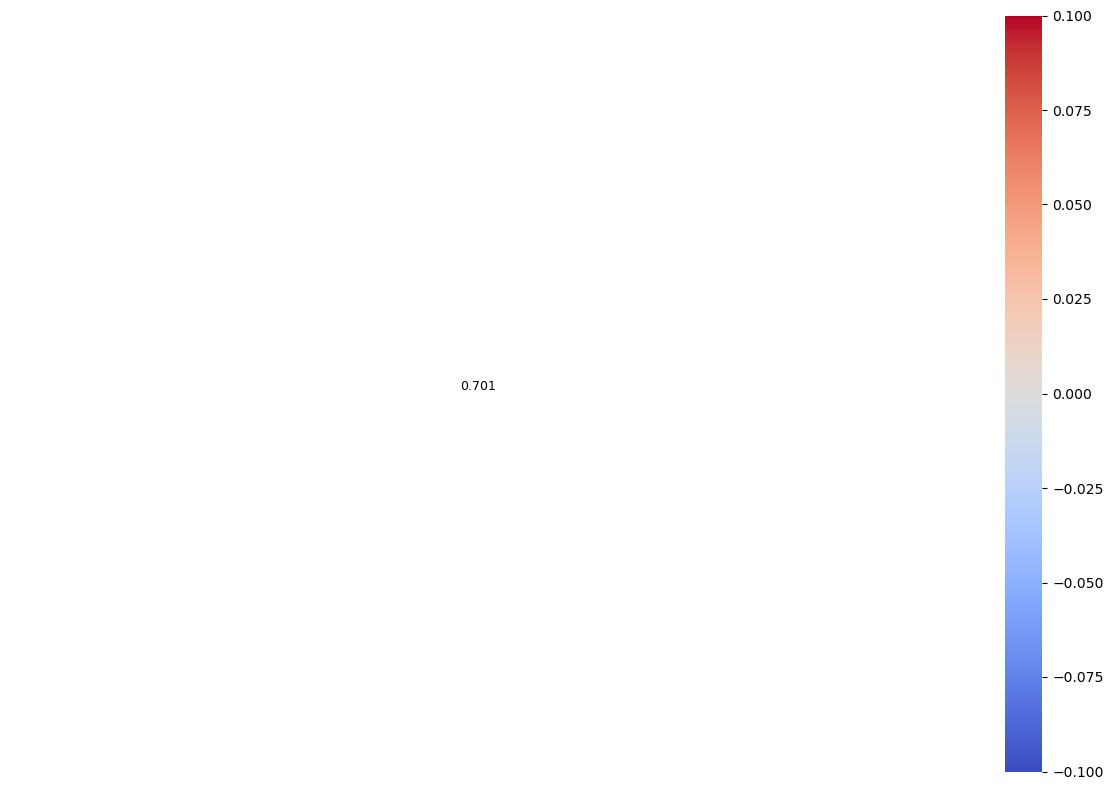

In [12]:
df2['industry'] = df2['industry'].apply(lambda x: x.replace('_', ' '))
df2 = df2.sort_values(by='mktrf_l_val', ascending=False).reset_index(drop=True)

# Step 2: Create Row and Column groups
n_rows = 5  # Number of rows in the heatmap grid
df2["Row"] = df2.index // n_rows  # Group by rows
df2["Column"] = df2.index % n_rows  # Group by columns

# Step 3: Reshape for Heatmap
heatmap_data = df2.pivot(index="Row", columns="Column", values="mktrf_l_val")
annotations = df2.pivot(index="Row", columns="Column", values="mktrf_l_sig")
industries = df2.pivot(index="Row", columns="Column", values="industry")

# Step 4: Plot the Heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
ax = sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True, linewidths=0.5)

# Step 5: Annotate the Heatmap with Coefficients and Stars
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        coeff = heatmap_data.iloc[i, j]
        star = annotations.iloc[i, j] if not pd.isna(annotations.iloc[i, j]) else ""
        industry = industries.iloc[i, j] if not pd.isna(industries.iloc[i, j]) else ""
        text = f"{coeff:.2f} {star}" if not pd.isna(coeff) else ""
        ax.text(j + 0.5, i + 0.5, f"{industry}\n{text}", ha="center", va="center", fontsize=9)

# Step 6: Adjust Layout
plt.title("Heatmap of Regression Coefficients with Significance", fontsize=14)
plt.title('')
plt.xticks([])  # Remove artificial column labels
plt.xlabel('')
plt.yticks([])  # Remove artificial row labels
plt.ylabel('')
plt.tight_layout()
plt.savefig("heatmap.png", format="png", dpi=600)
# Show the Heatmap
plt.show()